In [1]:
# kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# verinin yüklenmesi
data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# veri hakkında bilgi
data.info() # survived -> ölü/sağ, pclass -> yolcu sınıfı, sibsp -> kardeş sayısı, fare -> ücret, embarked -> binip binmeme durumu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# gereksiz veri çıkarma
data.drop(["PassengerId", "Cabin"], axis=1, inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:
# yaş sütunu kayıp veri doldurma
age_mean = np.round(np.mean(data.Age), 0)
print("Yaş Ortalaması: {}" .format(age_mean))
data["Age"] = data["Age"].fillna(age_mean)

# embarked da bulunan 2 tane kayıp veri satırını sil
data = data.dropna() 
data.info()

Yaş Ortalaması: 30.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


# TEK DEĞİŞKENLİ VERİ ANALİZİ

# Sayısal Değişkenler

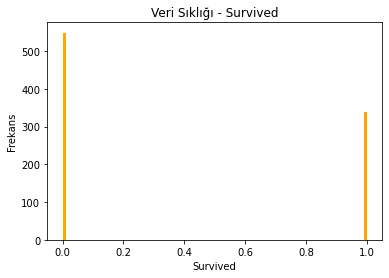

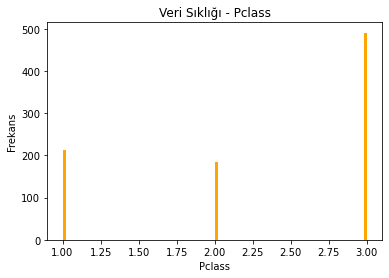

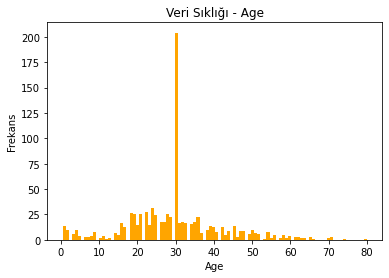

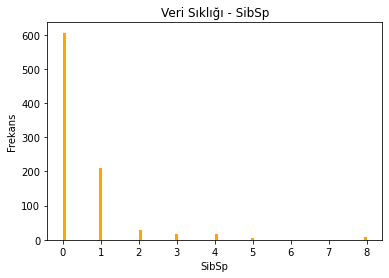

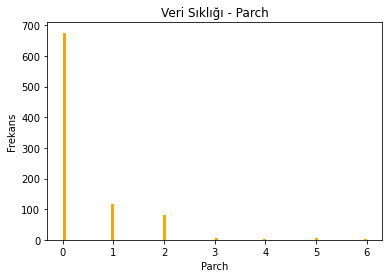

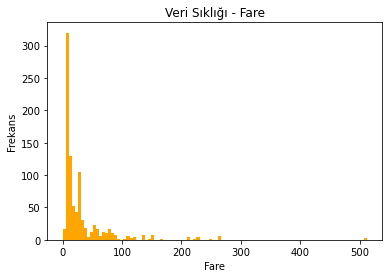

,Survived,Age,Fare
count,889.000000,889.000000,889.000000
mean,0.382452,29.713352,32.096681
std,0.486260,12.969135,49.697504
min,0.000000,0.420000,0.000000
25%,0.000000,22.000000,7.895800
50%,0.000000,30.000000,14.454200
75%,1.000000,35.000000,31.000000
max,1.000000,80.000000,512.329200


In [6]:
def PlotHistogram(variable):
    
    plt.figure()
    plt.hist(data[variable], bins=100, color="orange")
    plt.xlabel(variable)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}" .format(variable))
    plt.show()
    
numerical_variables = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"] 

for i in numerical_variables:
    PlotHistogram(i)
    
survived_statistical_attributes = data["Survived"].describe()
age_statistical_attributes = data["Age"].describe()
fare_statistical_attributes = data["Fare"].describe()
data_statistical_attributes = pd.concat([survived_statistical_attributes,age_statistical_attributes, fare_statistical_attributes], axis=1)
data_statistical_attributes

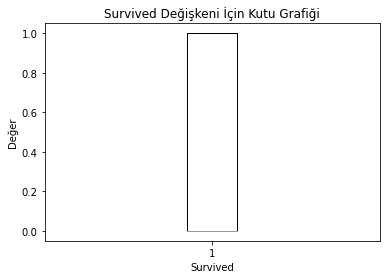

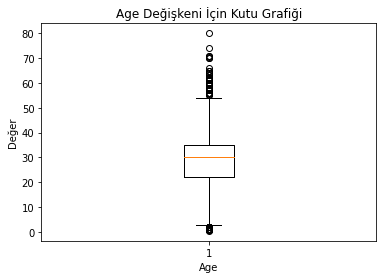

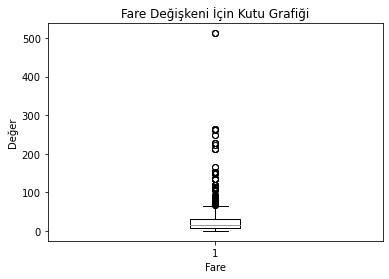

In [7]:
def BoxPlot(variable):
    
    plt.boxplot(data[variable])
    plt.xlabel(variable)
    plt.ylabel("Değer")
    plt.title(variable + " Değişkeni İçin Kutu Grafiği")
    plt.show()
    
choose_numerical_variables = ["Survived", "Age", "Fare"]

for i in choose_numerical_variables:
    BoxPlot(i)

# Kategorik Değişkenler

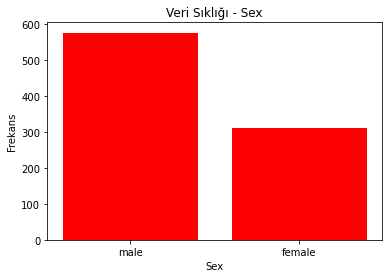

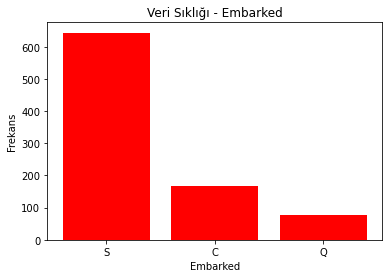

In [8]:
def PlotBar(variable, n=5):
    
    data_ = data[variable]
    data_counts = data_.value_counts()
    data_counts = data_counts[:n]
    
    plt.figure()
    plt.bar(data_counts.index, data_counts, color="red")
    plt.xlabel(variable)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}" .format(variable))
    plt.show()

categorical_variables = ["Sex", "Embarked"]

for i in categorical_variables:
    PlotBar(i)